In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
import pandas as pd
from datetime import datetime
import scipy.linalg as spla
from sklearn.preprocessing import StandardScaler
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def simple2DPlot(df, features):
    X = df[features]

    plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico

    plt.scatter(X[features[0]], X[features[1]], marker='o', color='blue', label='Ver')
    plt.xlabel(features[0])
    plt.ylabel(features[1])         
    plt.grid(True)  # Opcional: activa la cuadrícula
    plt.show()

In [3]:
#Mostrar problema del delimitador
#df = pd.read_csv("../../datasets/ansur_men.txt")
#df.columns
#http://mreed.umtri.umich.edu/mreed/downloads/anthro/ansur/ANSUR_88_Codes.pdf
#http://mreed.umtri.umich.edu/mreed/downloads/anthro/ansur/ADAS-Dimension_Definitions.pdf
#HT=>Heigth
df = pd.read_csv("../../datasets/ansur_men.txt", delimiter="\t")
columns = ["GENDER","WEIGHT", "AGE-ANSUR88", "CHEST_BRTH", "ACROMION_HT"]
df = df[columns]

In [4]:
df = df[df["GENDER"]==1]

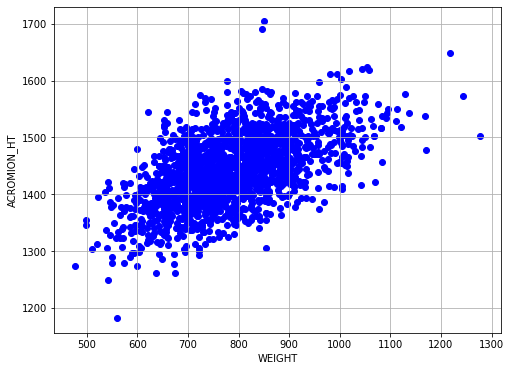

In [5]:
df.describe()
simple2DPlot(df, ["WEIGHT", "ACROMION_HT"], )


Hiperparametros.n_init‘auto’ or int, default=10.<br>
max_iter = iteraciones.<br>
algorithm{“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”.<br>

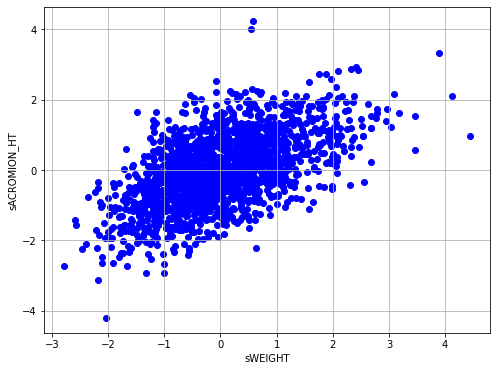

In [6]:
features = ["WEIGHT", "ACROMION_HT"] 
sfeatures = ["s"+f for f in features]
scaler = StandardScaler()
df.loc[:,sfeatures] = scaler.fit_transform(df[features])

simple2DPlot(df, sfeatures)


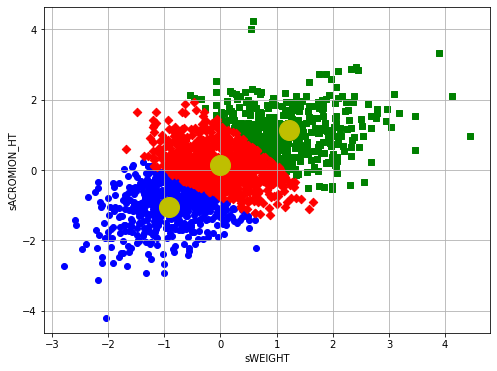

In [7]:
n_cluesters = 3
model = KMeans(n_clusters=n_cluesters)
model.fit(df[sfeatures])
centroides = model.cluster_centers_
etiquetas = model.labels_
df["cluster"] = etiquetas

plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
for i in range(n_cluesters):
    x = df[df["cluster"]==i][sfeatures[0]]
    y = df[df["cluster"]==i][sfeatures[1]]
    plt.scatter(x, y, marker=markers[i%len(markers)], color=colors[i%len(colors)])

plt.plot(centroides[:,0],centroides[:,1],'yo', markersize=20, label='centroides')
plt.xlabel(sfeatures[0])
plt.ylabel(sfeatures[1])  
plt.grid(True)  # Opcional: activa la cuadrícula
plt.show()


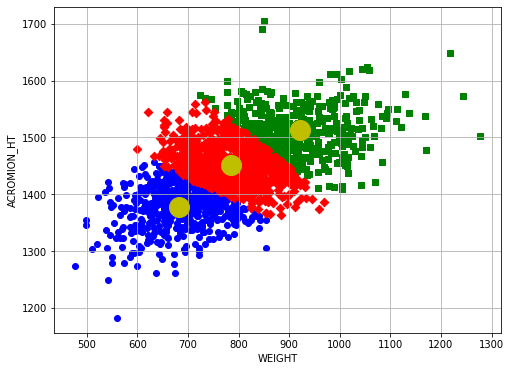

In [8]:
centroides_reales = scaler.inverse_transform(centroides)
plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
for i in range(n_cluesters):
    x = df[df["cluster"]==i][features[0]]
    y = df[df["cluster"]==i][features[1]]
    plt.scatter(x, y, marker=markers[i%len(markers)], color=colors[i%len(colors)])

plt.plot(centroides_reales[:,0],centroides_reales[:,1],'yo', markersize=20, label='centroides')
plt.xlabel(features[0])
plt.ylabel(features[1])  

plt.grid(True)  # Opcional: activa la cuadrícula
plt.show()


In [9]:
centroides_reales

array([[ 682.43589744, 1376.77472527],
       [ 921.15217391, 1512.27777778],
       [ 784.26167076, 1451.11425061]])

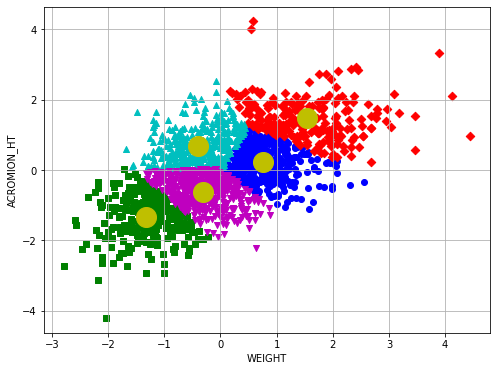

In [10]:
n_cluesters = 5
model = KMeans(n_clusters=n_cluesters)
model.fit(df[sfeatures])
centroides = model.cluster_centers_
etiquetas = model.labels_
df["cluster"] = etiquetas

plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
for i in range(n_cluesters):
    x = df[df["cluster"]==i][sfeatures[0]]
    y = df[df["cluster"]==i][sfeatures[1]]
    plt.scatter(x, y, marker=markers[i%len(markers)], color=colors[i%len(colors)])

plt.plot(centroides[:,0],centroides[:,1],'yo', markersize=20, label='centroides')
plt.xlabel(features[0])
plt.ylabel(features[1])  
plt.grid(True)  # Opcional: activa la cuadrícula
plt.show()

In [11]:
scaler.inverse_transform(centroides)

array([[ 869.82619048, 1456.20238095],
       [ 638.52      , 1359.38545455],
       [ 955.88181818, 1533.37272727],
       [ 741.40053763, 1484.55107527],
       [ 750.18685832, 1404.47227926]])